Importing packages and initialization of data set arrays

In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os

sns.set()

try:
    os.mkdir("plots")
    os.mkdir("plots\Traveltime")
    os.mkdir("plots\Asocialness")
    os.mkdir("plots\Carcount")
    os.mkdir("plots\LaneChanges")
except:
    pass

asocial_values = np.linspace(0.0, 1.0, num= 11)
roaddensities = np.arange(10, 210, 10)

Importing data sets from csv

In [2]:
data = {}

for density in roaddensities:
    data[density] = {}
    
    for j, asocialness in enumerate(asocial_values):
        data[density][asocialness] = pd.read_csv('output_%sasocial%s, 1000points.csv' % (density, asocialness))
        

Plotting Travel time per case

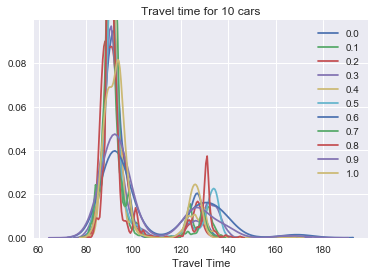

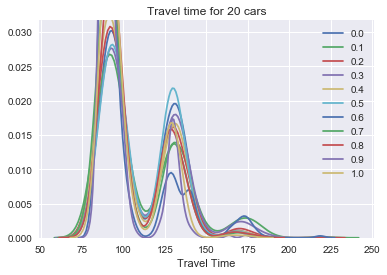

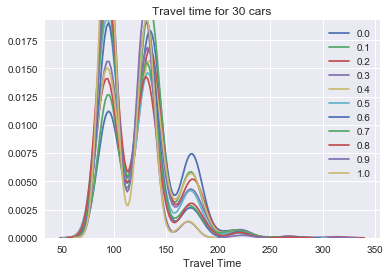

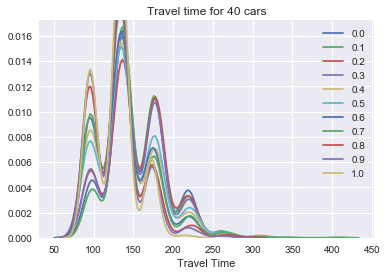

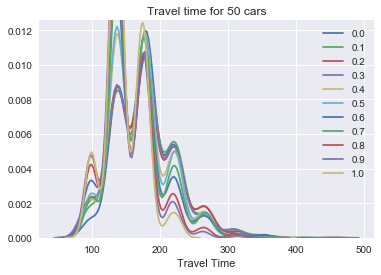

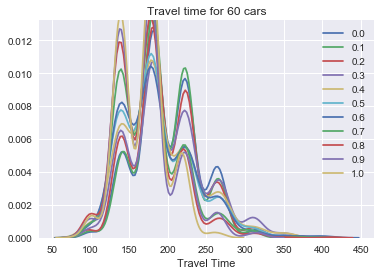

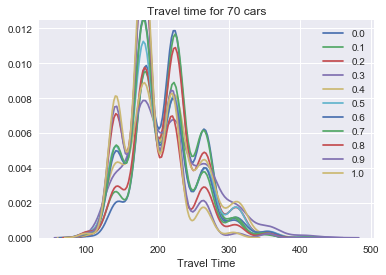

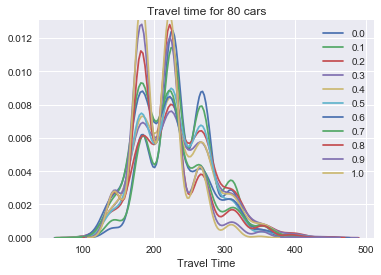

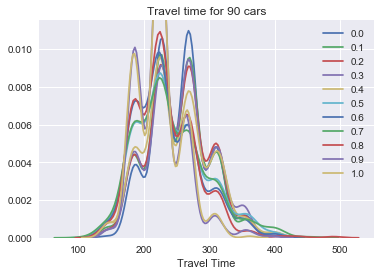

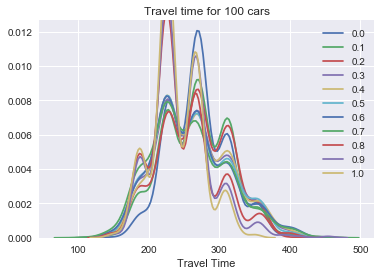

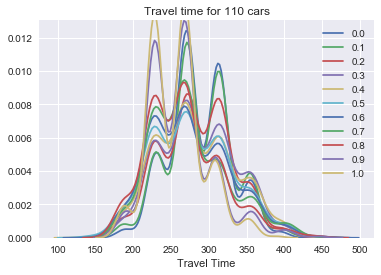

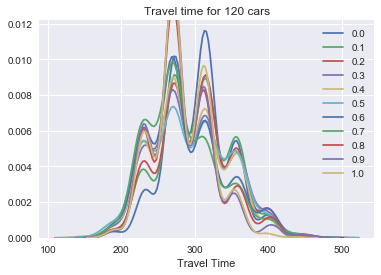

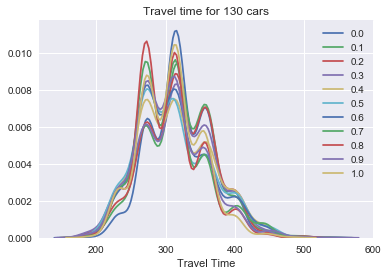

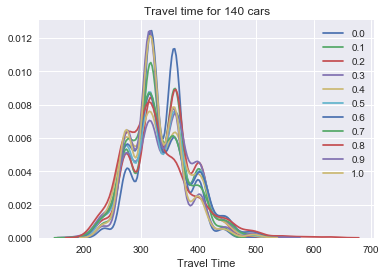

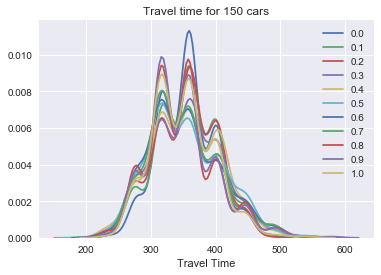

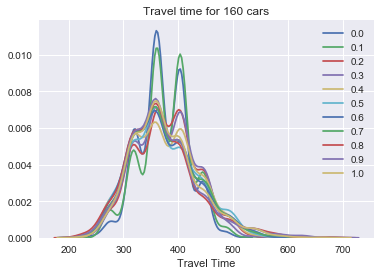

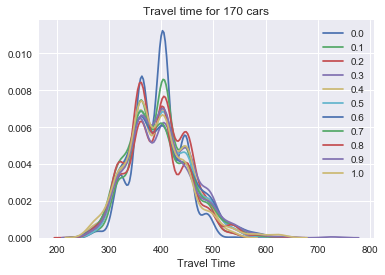

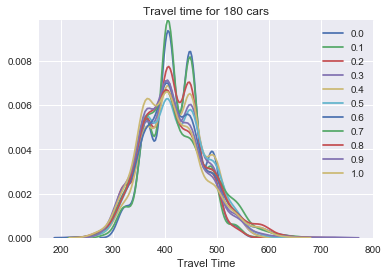

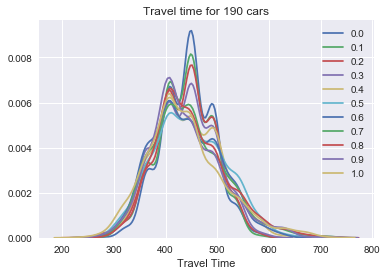

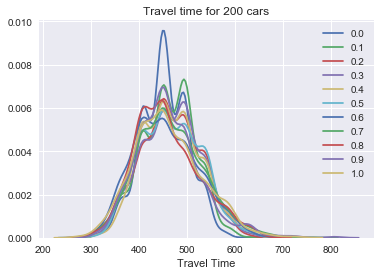

In [3]:
for density in roaddensities:
    for value in asocial_values:
        sns.distplot(data[density][value]['Travel Time'],kde = True, hist=False, norm_hist = False, label = value)
        
    #plt.xlim(0, 1500)
    plt.title('Travel time for %s cars' % (density))
    plt.legend()
    plt.savefig('plots\Traveltime\Traveltimes%s.pdf' % (density))
    plt.show()



Plot Travel Time boxplots per case

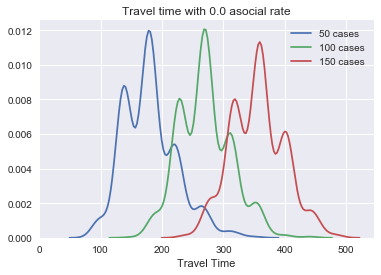

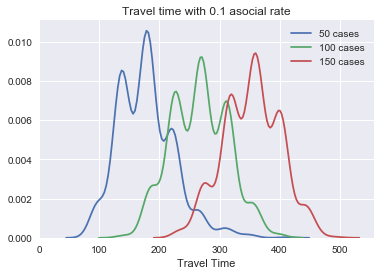

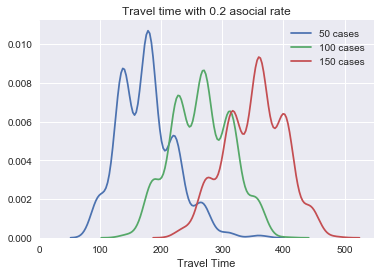

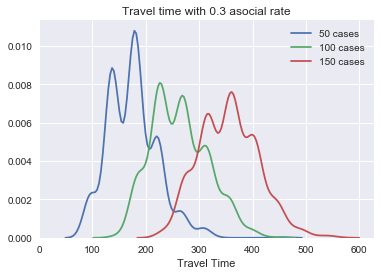

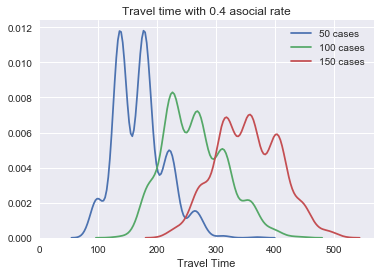

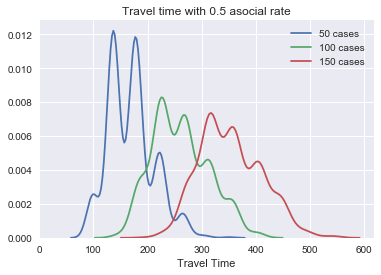

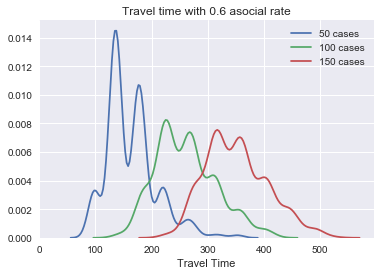

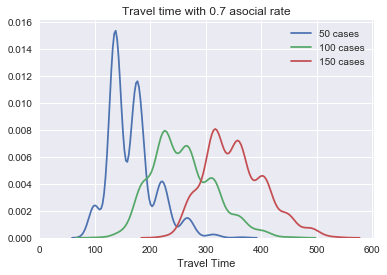

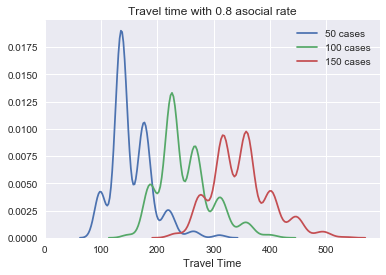

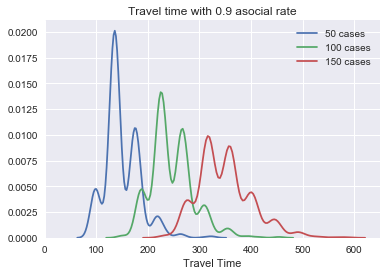

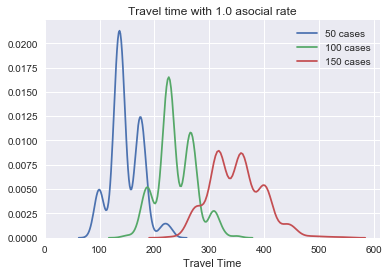

In [4]:
for value in asocial_values:
    sns.distplot(data[50][value]['Travel Time'],kde = True, hist=False, norm_hist = False, label = "50 cases")
    sns.distplot(data[100][value]['Travel Time'],kde = True, hist=False, norm_hist = False, label = "100 cases")
    sns.distplot(data[150][value]['Travel Time'],kde = True, hist=False, norm_hist = False, label = "150 cases")
        
    plt.xlim(xmin=0)
    plt.title('Travel time with %s asocial rate' % (value))
    plt.legend()
    plt.savefig('plots\Traveltime\\3cases_Asocial%s.pdf' % (value))
    plt.show()

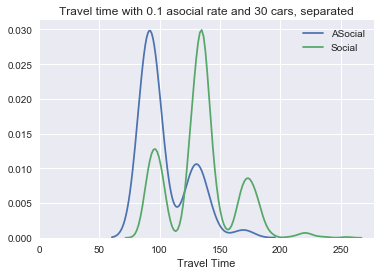

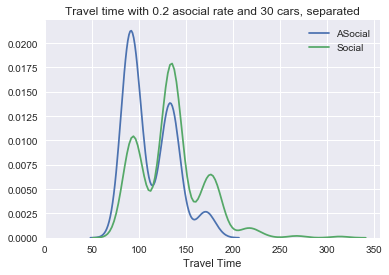

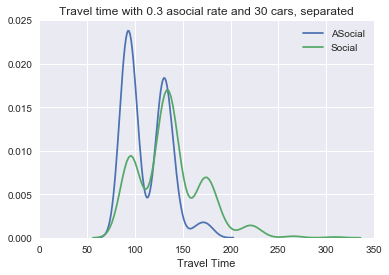

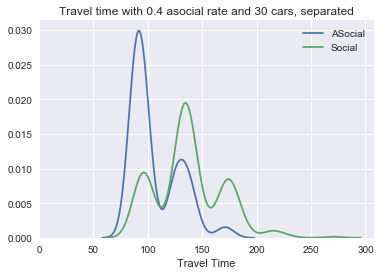

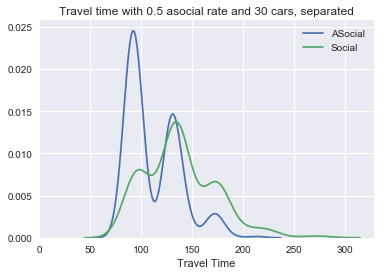

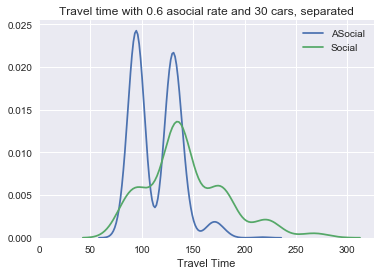

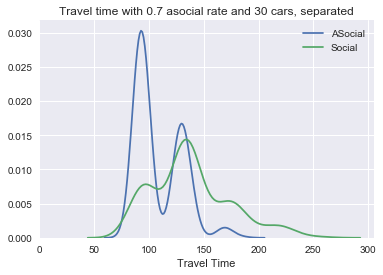

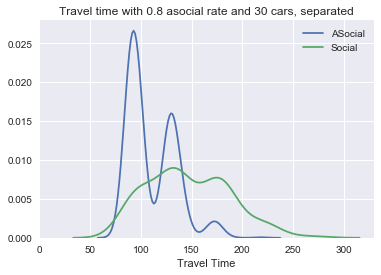

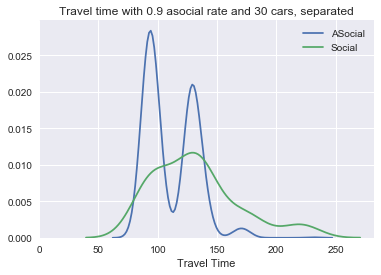

In [5]:
density = 30

for value in asocial_values[1:-1]:
    sns.distplot(data[density][value].loc[data[density][value]['ASocial']]['Travel Time'],kde = True, hist=False, norm_hist = False, label = 'ASocial')
    sns.distplot(data[density][value].loc[~data[density][value]['ASocial']]['Travel Time'],kde = True, hist=False, norm_hist = False, label = 'Social')
        
    plt.xlim(xmin=0)
    plt.title('Travel time with %s asocial rate and %s cars, separated' % (value,density))
    plt.legend()
    plt.savefig('plots\Traveltime\separated_Asocial%s_%scars.pdf' % (value, density))
    plt.show()

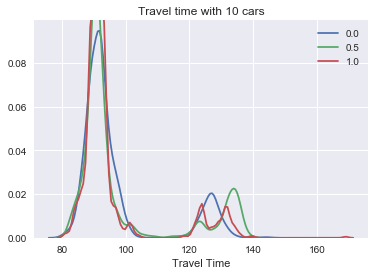

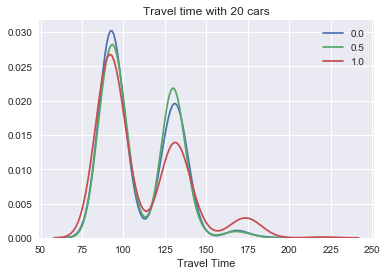

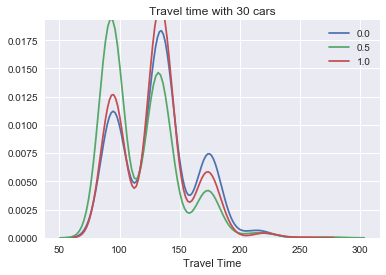

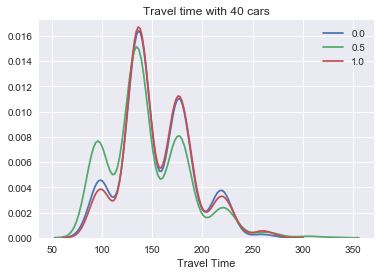

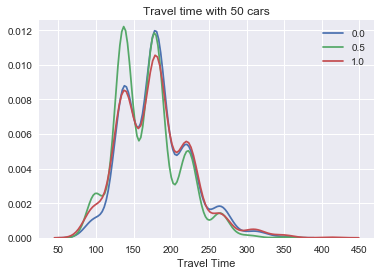

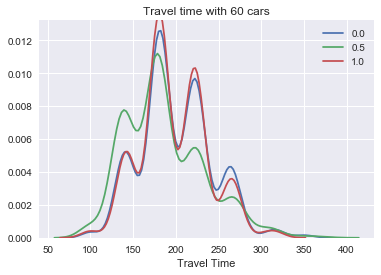

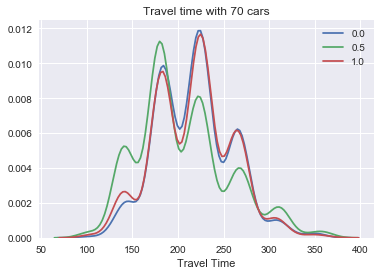

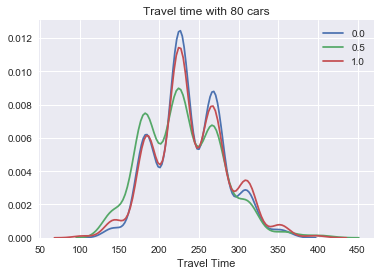

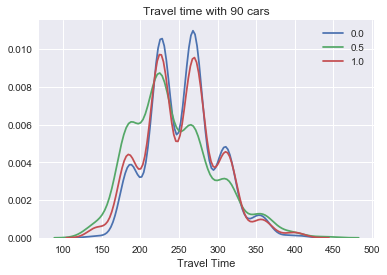

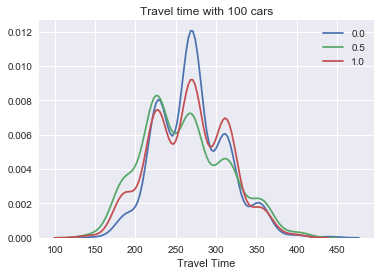

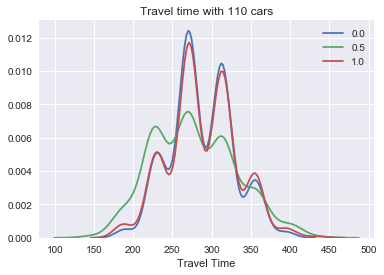

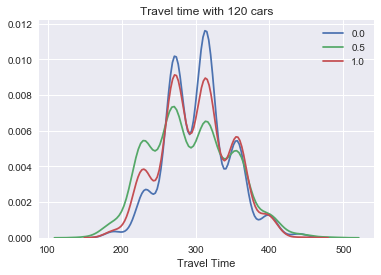

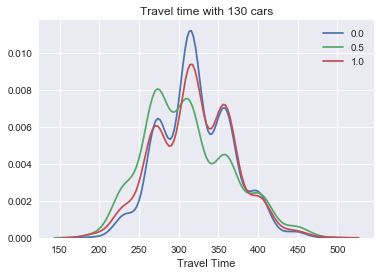

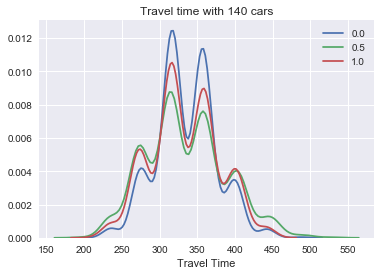

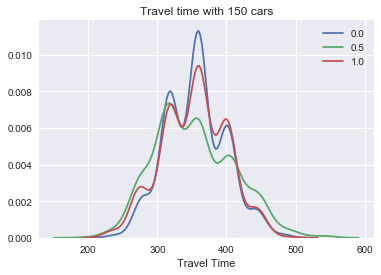

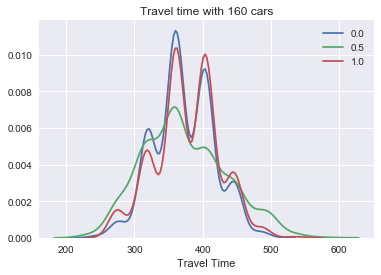

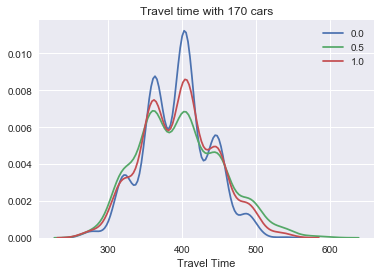

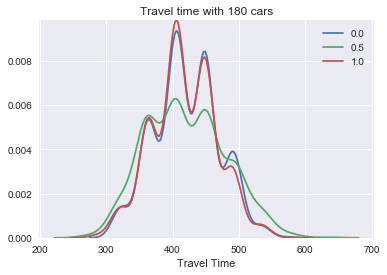

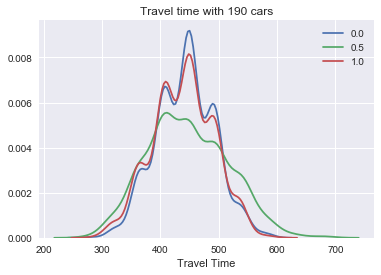

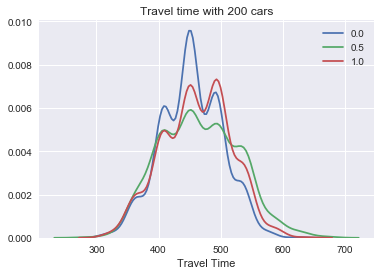

In [6]:
for density in roaddensities:
    sns.distplot(data[density][0.0]['Travel Time'],kde = True, hist=False, norm_hist = False, label = 0.0)
    sns.distplot(data[density][0.5]['Travel Time'],kde = True, hist=False, norm_hist = False, label = 0.5)
    sns.distplot(data[density][0.1]['Travel Time'],kde = True, hist=False, norm_hist = False, label = 1.0)
        
    #plt.xlim(0, 1500)
    plt.title('Travel time with %s cars' % (density))
    plt.legend()
    plt.savefig('plots\Traveltime\Density%s_3cases.pdf' % (density))
    plt.show()



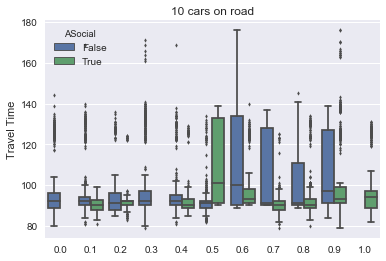

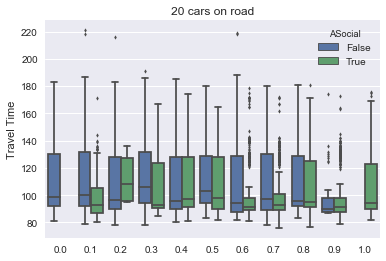

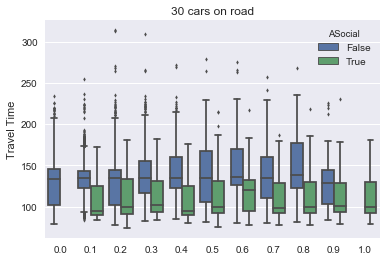

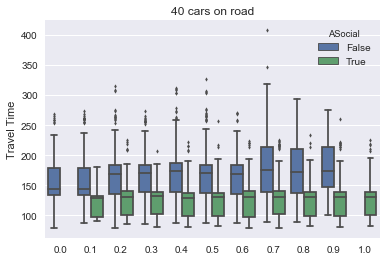

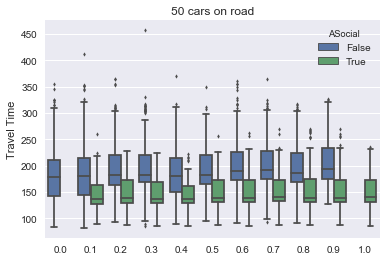

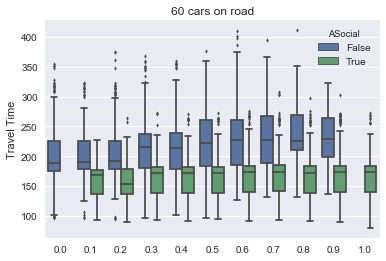

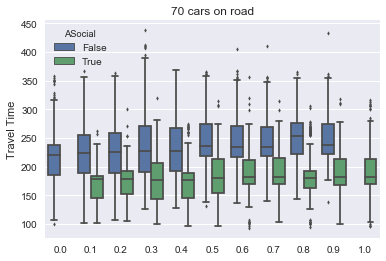

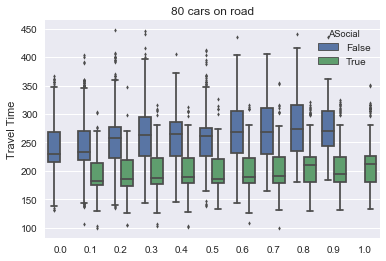

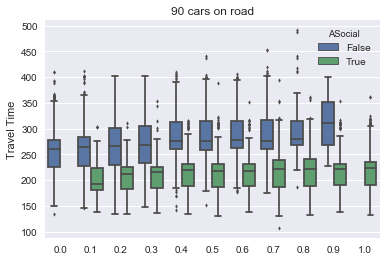

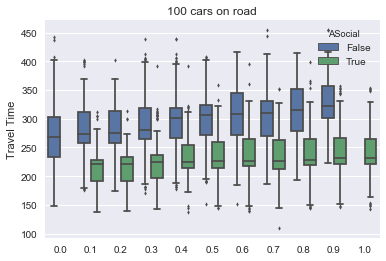

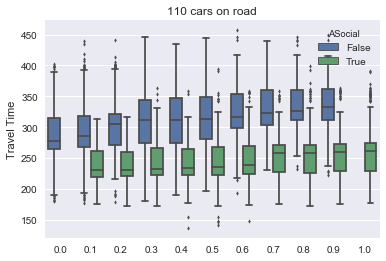

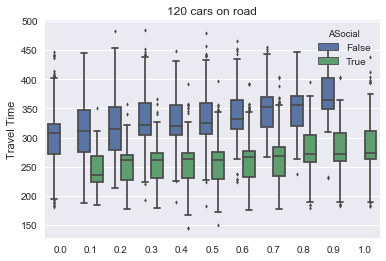

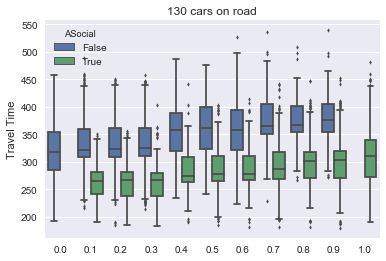

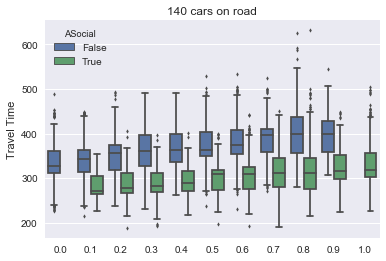

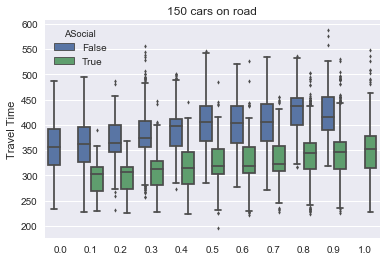

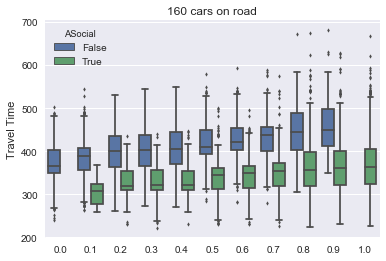

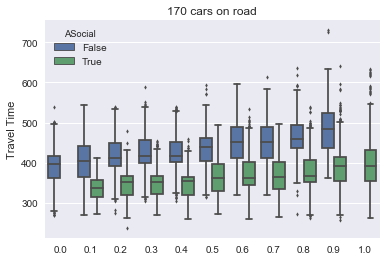

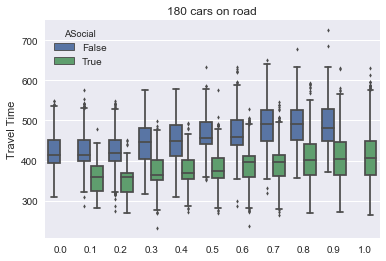

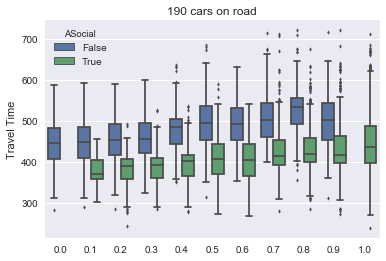

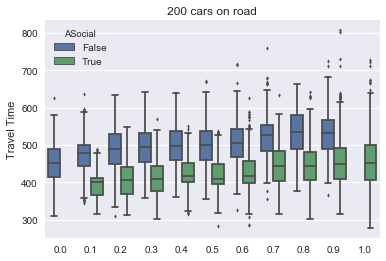

In [12]:
for density in roaddensities:
    sns.boxplot(x = 'ASocial Rate', y = 'Travel Time', hue = 'ASocial', data = pd.concat(data[density]), fliersize = 3)
    plt.title('%s cars on road' % (density))
    plt.xlabel('')#Probability of Selfishness)
    plt.ylabel('Travel Time')
    #plt.ylim(ymax=2000)
    plt.savefig('plots\Asocialness\TT_boxplot_for_%s_cars.pdf' % (density))
    plt.show()

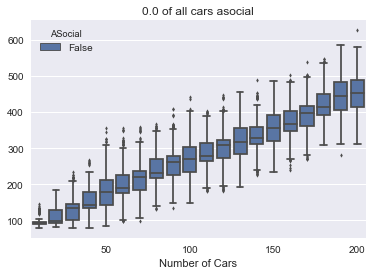

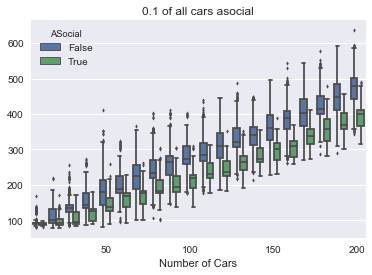

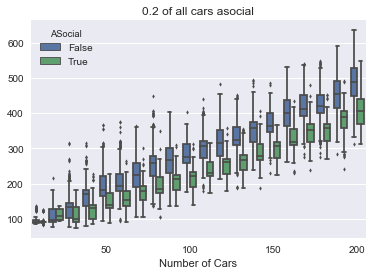

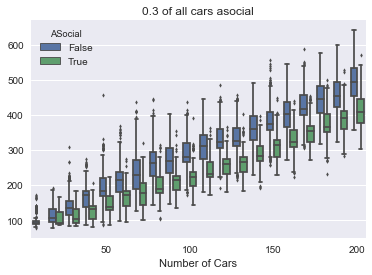

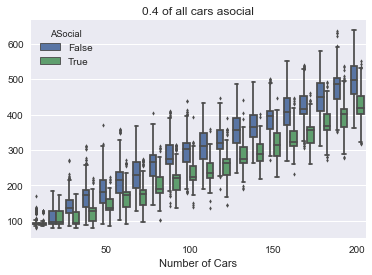

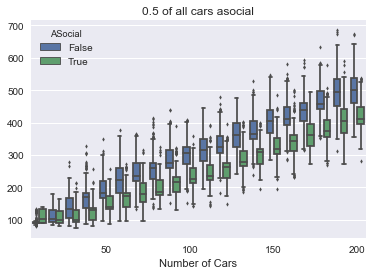

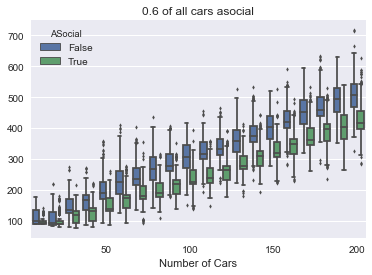

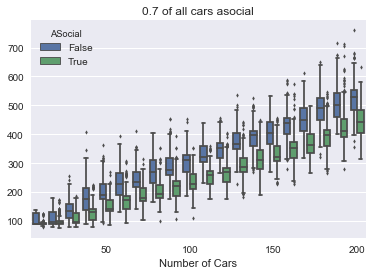

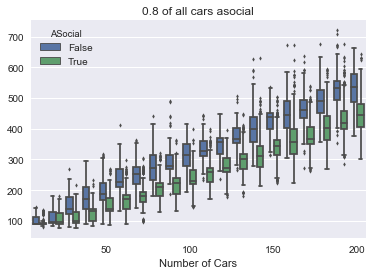

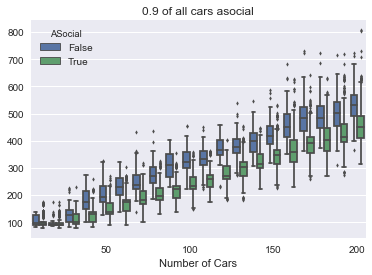

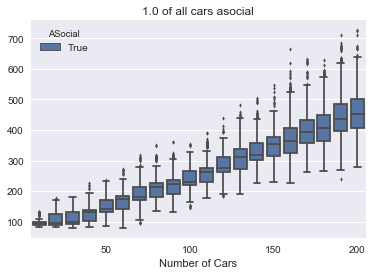

In [8]:
#flipping the nested dict from [density][asocialness] to [asocialness][density]
revdata = {}
for k1, subdict in data.items():
        for k2, v in subdict.items():
            revdata.setdefault(k2, {})[k1] = v

for value in asocial_values:
    sns.boxplot(x = 'Total Cars', y = 'Travel Time', hue = 'ASocial', data = pd.concat(revdata[value]), fliersize = 3)
    plt.title('%s of all cars asocial' % (value))
    plt.xlabel('Number of Cars')
    plt.xticks(np.arange(4,20,5), range(50, 210, 50))
    plt.ylabel('')
    #plt.ylim(ymax=2000)
    plt.savefig('plots\Traveltime\TT_boxplot_for_%s_asocialness.pdf' % (value))
    plt.show()

Plot Lane Change counts per case

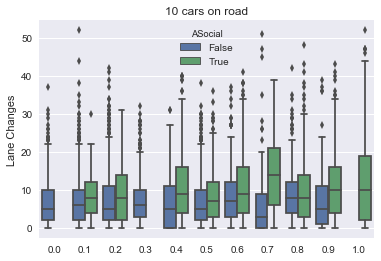

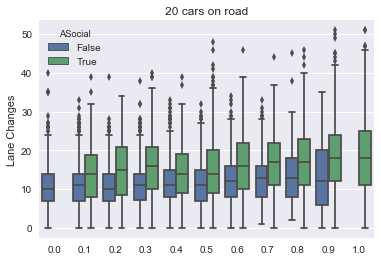

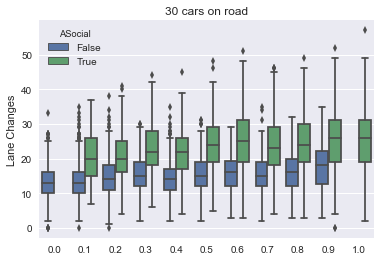

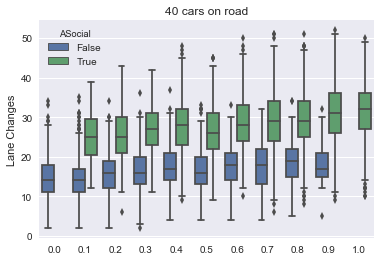

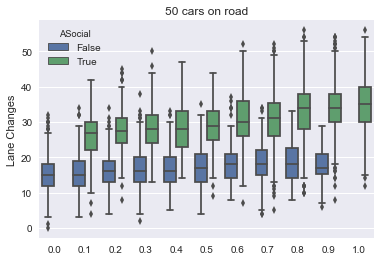

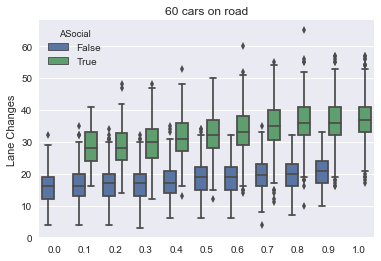

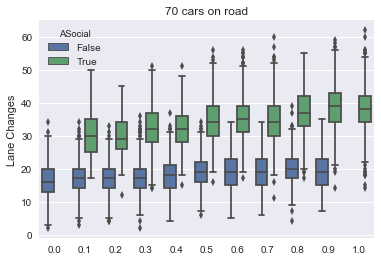

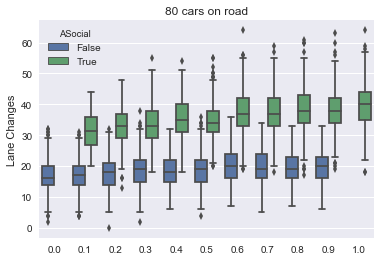

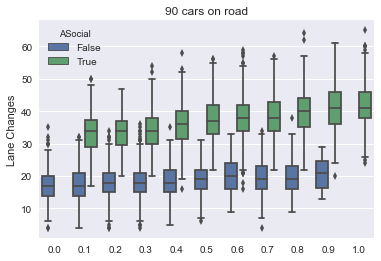

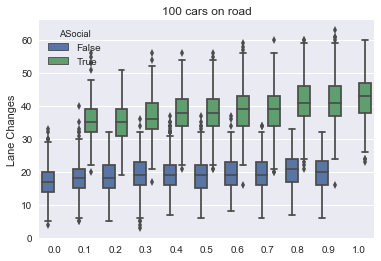

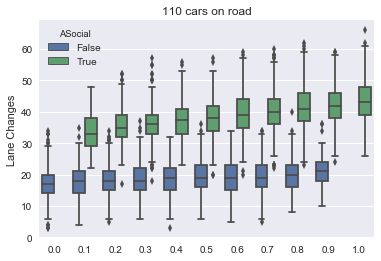

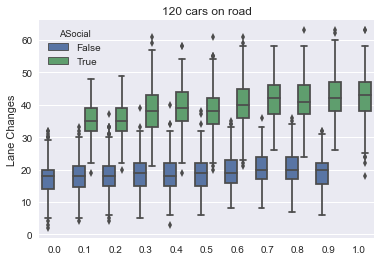

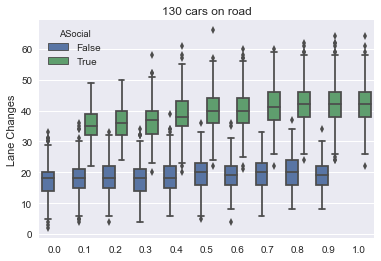

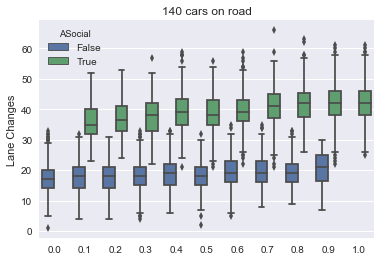

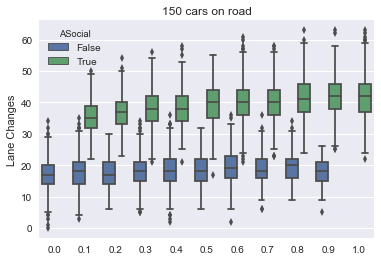

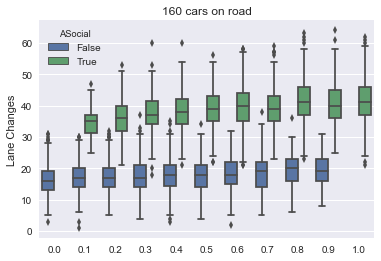

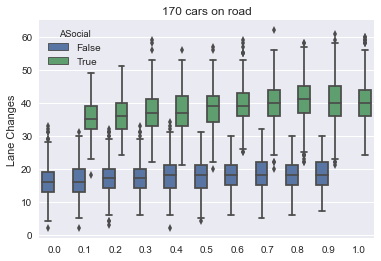

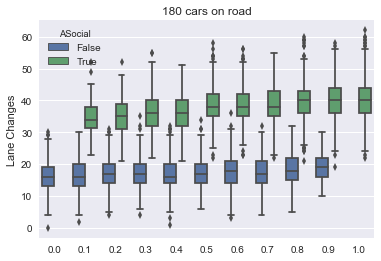

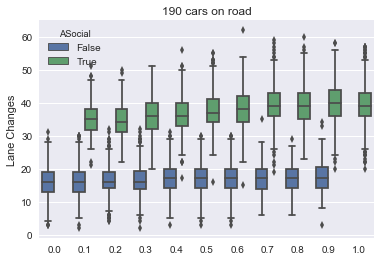

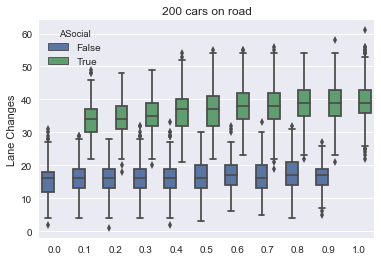

In [11]:
for density in roaddensities:
    alldata = pd.concat(data[density])
    sns.boxplot(x = 'ASocial Rate', y = 'Lane Changes', hue = 'ASocial', data = alldata)
    
    plt.title('%s cars on road' % (density))
    plt.xlabel('')#Probability of Selfishness)
    plt.ylabel('Lane Changes')
    #plt.ylim(ymax=80)
    plt.savefig('plots\LaneChanges\lanechanges_%s_cars.pdf' % (density))
    plt.show()

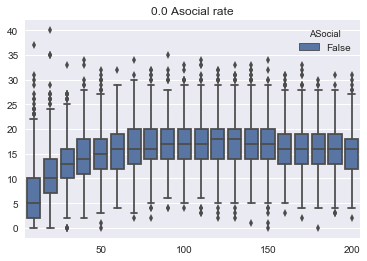

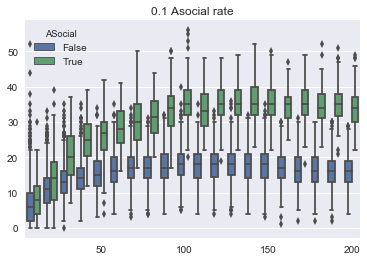

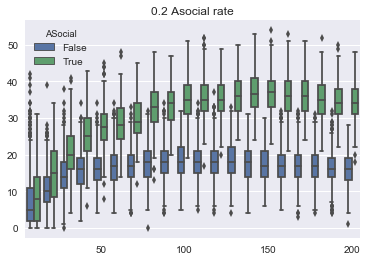

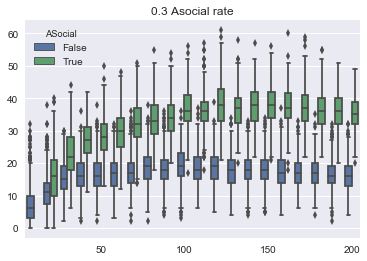

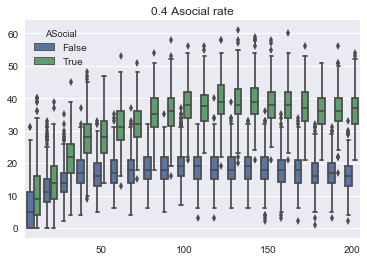

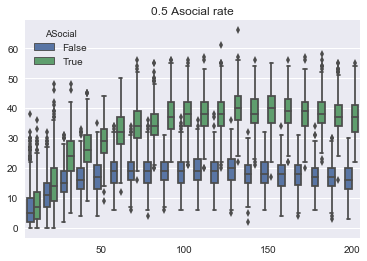

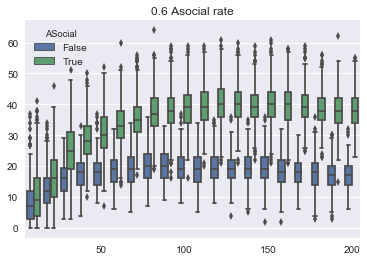

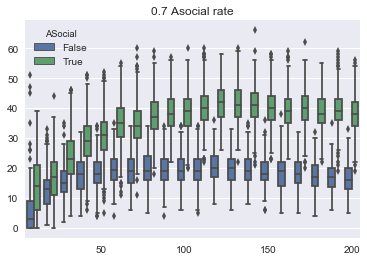

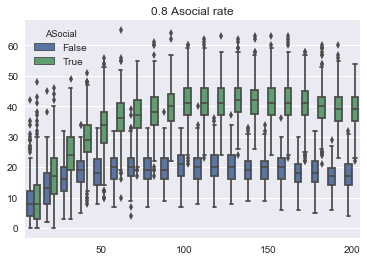

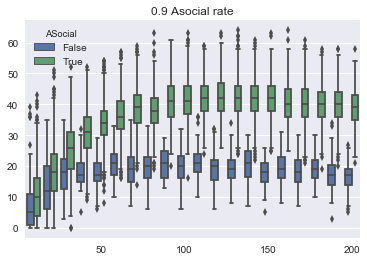

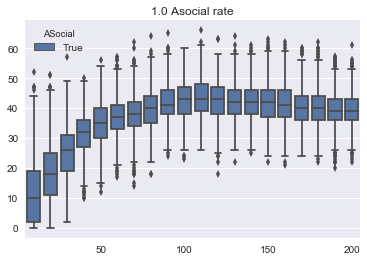

In [10]:
for value in asocial_values:
    alldata = pd.concat(revdata[value])
    sns.boxplot(x = 'Total Cars', y = 'Lane Changes', hue = 'ASocial', data = alldata)
    
    plt.title('%s Asocial rate' % (value))
    plt.xlabel('')#Probability of Selfishness)
    plt.ylabel('')
    plt.xticks(np.arange(4,20,5), range(50, 210, 50))
    plt.savefig('plots\LaneChanges\lanechanges_%s_asocialrate.pdf' % (value))
    plt.show()